## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  91.457515  1053.335042  0.456011   4.811519  1.542951
1  95.283976   235.875155  0.141682   5.506413  0.356962
2  48.909067  1281.012081  0.907993  10.684357  1.647792
3  97.633008   943.570997  0.266718   1.237828  1.232897
4  95.122851  1413.896449  0.128736   4.636570  1.132436


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0455888	total: 69.4ms	remaining: 1m 9s
1:	learn: 1.0334505	total: 69.9ms	remaining: 34.9s
2:	learn: 1.0241757	total: 70.5ms	remaining: 23.4s
3:	learn: 1.0146568	total: 71.1ms	remaining: 17.7s
4:	learn: 1.0048275	total: 71.6ms	remaining: 14.2s
5:	learn: 0.9925891	total: 72.1ms	remaining: 11.9s
6:	learn: 0.9795290	total: 72.6ms	remaining: 10.3s
7:	learn: 0.9668057	total: 73ms	remaining: 9.05s
8:	learn: 0.9543334	total: 73.5ms	remaining: 8.1s
9:	learn: 0.9438555	total: 74ms	remaining: 7.32s
10:	learn: 0.9348860	total: 74.4ms	remaining: 6.69s
11:	learn: 0.9253592	total: 74.9ms	remaining: 6.17s
12:	learn: 0.9157470	total: 75.3ms	remaining: 5.72s
13:	learn: 0.9050683	total: 75.8ms	remaining: 5.34s
14:	learn: 0.8957406	total: 76.3ms	remaining: 5.01s
15:	learn: 0.8857334	total: 76.7ms	remaining: 4.72s
16:	learn: 0.8756819	total: 77.1ms	remaining: 4.46s
17:	learn: 0.8658457	total: 77.6ms	remaining: 4.23s
18:	learn: 0.8583791	total: 78.1ms	remaining: 4.0

83:	learn: 0.4664002	total: 108ms	remaining: 1.18s
84:	learn: 0.4631209	total: 109ms	remaining: 1.17s
85:	learn: 0.4588563	total: 109ms	remaining: 1.16s
86:	learn: 0.4561404	total: 110ms	remaining: 1.15s
87:	learn: 0.4524624	total: 110ms	remaining: 1.14s
88:	learn: 0.4484891	total: 111ms	remaining: 1.13s
89:	learn: 0.4450890	total: 111ms	remaining: 1.13s
90:	learn: 0.4411334	total: 112ms	remaining: 1.12s
91:	learn: 0.4376658	total: 112ms	remaining: 1.11s
92:	learn: 0.4346495	total: 113ms	remaining: 1.1s
93:	learn: 0.4314067	total: 113ms	remaining: 1.09s
94:	learn: 0.4282950	total: 113ms	remaining: 1.08s
95:	learn: 0.4249156	total: 114ms	remaining: 1.07s
96:	learn: 0.4213949	total: 114ms	remaining: 1.06s
97:	learn: 0.4176762	total: 115ms	remaining: 1.05s
98:	learn: 0.4151194	total: 115ms	remaining: 1.05s
99:	learn: 0.4116211	total: 116ms	remaining: 1.04s
100:	learn: 0.4088350	total: 116ms	remaining: 1.03s
101:	learn: 0.4060480	total: 116ms	remaining: 1.02s
102:	learn: 0.4027984	total: 1

259:	learn: 0.1744588	total: 186ms	remaining: 530ms
260:	learn: 0.1737932	total: 187ms	remaining: 528ms
261:	learn: 0.1730876	total: 187ms	remaining: 527ms
262:	learn: 0.1725305	total: 188ms	remaining: 526ms
263:	learn: 0.1720148	total: 188ms	remaining: 524ms
264:	learn: 0.1713982	total: 188ms	remaining: 522ms
265:	learn: 0.1710230	total: 189ms	remaining: 521ms
266:	learn: 0.1703712	total: 189ms	remaining: 520ms
267:	learn: 0.1700006	total: 190ms	remaining: 518ms
268:	learn: 0.1691904	total: 190ms	remaining: 516ms
269:	learn: 0.1686929	total: 190ms	remaining: 515ms
270:	learn: 0.1681000	total: 191ms	remaining: 513ms
271:	learn: 0.1673673	total: 191ms	remaining: 512ms
272:	learn: 0.1668045	total: 192ms	remaining: 510ms
273:	learn: 0.1659572	total: 192ms	remaining: 508ms
274:	learn: 0.1654191	total: 192ms	remaining: 507ms
275:	learn: 0.1645162	total: 193ms	remaining: 505ms
276:	learn: 0.1639807	total: 193ms	remaining: 504ms
277:	learn: 0.1632941	total: 194ms	remaining: 503ms
278:	learn: 

510:	learn: 0.0853546	total: 290ms	remaining: 277ms
511:	learn: 0.0851846	total: 290ms	remaining: 277ms
512:	learn: 0.0849008	total: 291ms	remaining: 276ms
513:	learn: 0.0846604	total: 291ms	remaining: 275ms
514:	learn: 0.0843834	total: 292ms	remaining: 275ms
515:	learn: 0.0840654	total: 292ms	remaining: 274ms
516:	learn: 0.0836683	total: 292ms	remaining: 273ms
517:	learn: 0.0834739	total: 293ms	remaining: 272ms
518:	learn: 0.0832034	total: 293ms	remaining: 272ms
519:	learn: 0.0828158	total: 294ms	remaining: 271ms
520:	learn: 0.0826261	total: 294ms	remaining: 270ms
521:	learn: 0.0822478	total: 295ms	remaining: 270ms
522:	learn: 0.0819890	total: 295ms	remaining: 269ms
523:	learn: 0.0816943	total: 296ms	remaining: 268ms
524:	learn: 0.0813588	total: 296ms	remaining: 268ms
525:	learn: 0.0809921	total: 296ms	remaining: 267ms
526:	learn: 0.0807314	total: 297ms	remaining: 267ms
527:	learn: 0.0805800	total: 297ms	remaining: 266ms
528:	learn: 0.0802216	total: 298ms	remaining: 265ms
529:	learn: 

688:	learn: 0.0517402	total: 368ms	remaining: 166ms
689:	learn: 0.0516429	total: 369ms	remaining: 166ms
690:	learn: 0.0515486	total: 369ms	remaining: 165ms
691:	learn: 0.0514128	total: 369ms	remaining: 164ms
692:	learn: 0.0513024	total: 370ms	remaining: 164ms
693:	learn: 0.0512082	total: 370ms	remaining: 163ms
694:	learn: 0.0510665	total: 371ms	remaining: 163ms
695:	learn: 0.0509743	total: 371ms	remaining: 162ms
696:	learn: 0.0508281	total: 372ms	remaining: 162ms
697:	learn: 0.0506552	total: 372ms	remaining: 161ms
698:	learn: 0.0504857	total: 372ms	remaining: 160ms
699:	learn: 0.0503193	total: 373ms	remaining: 160ms
700:	learn: 0.0502116	total: 373ms	remaining: 159ms
701:	learn: 0.0501159	total: 374ms	remaining: 159ms
702:	learn: 0.0500257	total: 374ms	remaining: 158ms
703:	learn: 0.0498868	total: 375ms	remaining: 158ms
704:	learn: 0.0497511	total: 375ms	remaining: 157ms
705:	learn: 0.0496578	total: 376ms	remaining: 156ms
706:	learn: 0.0495547	total: 376ms	remaining: 156ms
707:	learn: 

921:	learn: 0.0293580	total: 472ms	remaining: 39.9ms
922:	learn: 0.0293130	total: 473ms	remaining: 39.4ms
923:	learn: 0.0292697	total: 473ms	remaining: 38.9ms
924:	learn: 0.0292015	total: 473ms	remaining: 38.4ms
925:	learn: 0.0291573	total: 474ms	remaining: 37.9ms
926:	learn: 0.0290574	total: 474ms	remaining: 37.4ms
927:	learn: 0.0289945	total: 475ms	remaining: 36.8ms
928:	learn: 0.0289215	total: 475ms	remaining: 36.3ms
929:	learn: 0.0288778	total: 476ms	remaining: 35.8ms
930:	learn: 0.0288303	total: 476ms	remaining: 35.3ms
931:	learn: 0.0287636	total: 477ms	remaining: 34.8ms
932:	learn: 0.0287207	total: 477ms	remaining: 34.3ms
933:	learn: 0.0286770	total: 477ms	remaining: 33.7ms
934:	learn: 0.0286350	total: 478ms	remaining: 33.2ms
935:	learn: 0.0285692	total: 478ms	remaining: 32.7ms
936:	learn: 0.0285042	total: 479ms	remaining: 32.2ms
937:	learn: 0.0284623	total: 479ms	remaining: 31.7ms
938:	learn: 0.0283933	total: 480ms	remaining: 31.2ms
939:	learn: 0.0282997	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

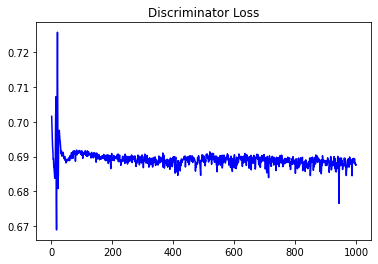

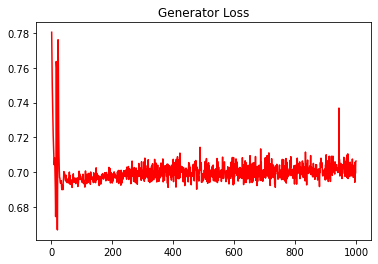

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12365084146683962


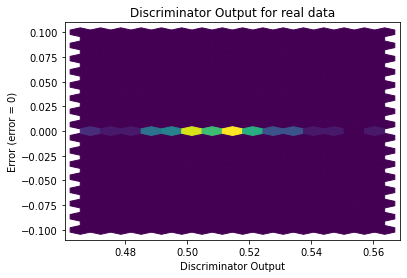

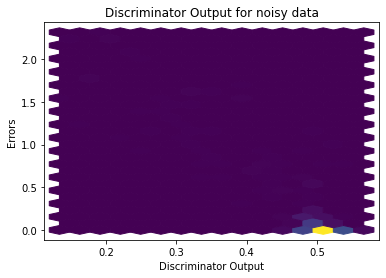

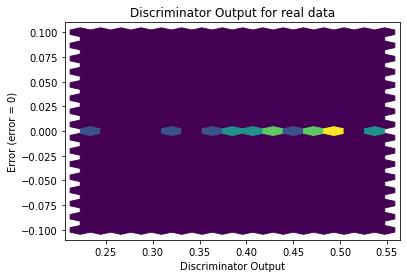

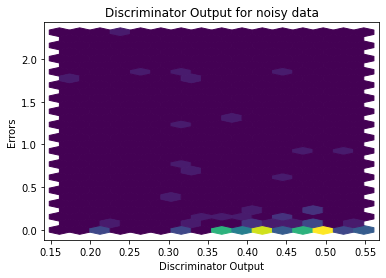

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


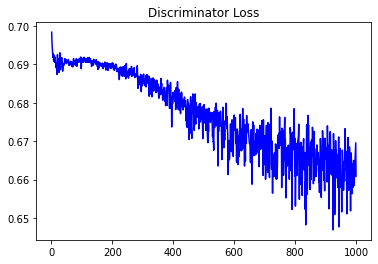

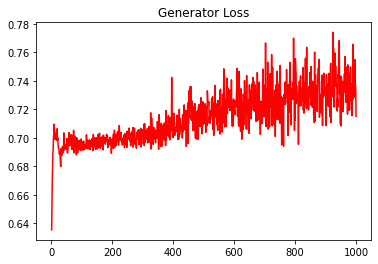

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13073209837957686


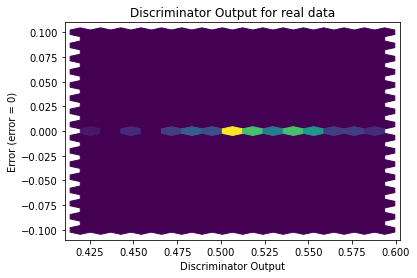

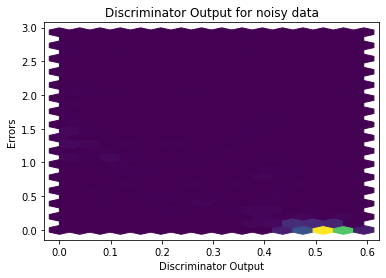

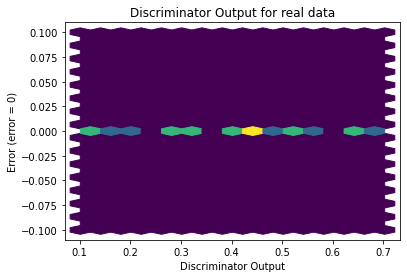

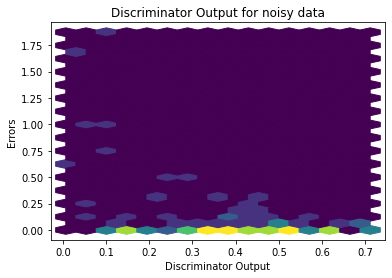

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1924]], requires_grad=True)
